In [1]:
import pandas as pd
import os
import re
import matplotlib

In [39]:
# Empty Array of dataframes to hold data
dfs = []

# Directory with Temperature Files
directory = 'data/Govee/'

# Iterate over each json file in directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Open and load json file and close when done
        with open(os.path.join(directory, filename)) as f:
            data = pd.read_csv(f, names=['date_time', 'temperature', 'humidity'], header=0)
            sensor = re.search('(.*)_export.*', filename).group(1)
            data['sensor'] = sensor
            dfs.append(data)

<AxesSubplot:>

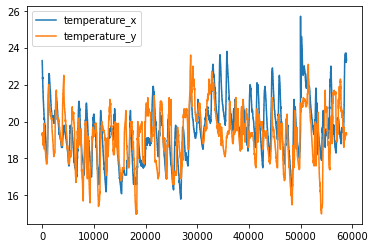

In [62]:
df = pd.concat(dfs, ignore_index=True)
df.dropna()
df.date_time = pd.to_datetime(df.date_time)

bedroom = df[df.sensor.str.contains('Bedroom')]
living_room = df[df.sensor.str.contains('Living Room')]
laundry = df[df.sensor.str.contains('Laundry')]

df = pd.merge(bedroom, living_room, how='outer', on='date_time').dropna()
# df = pd.merge(df, laundry, how='outer', on='date_time')
# df.to_csv('output/bedroom_vs_livingroom.csv')
df[['temperature_x', 'temperature_y']].plot()

In [28]:
df.groupby(pd.Grouper(key='date_time', axis=0, freq='min')).mean().dropna().to_csv('output/bedroom-temps.csv')

In [12]:
df.set_index(pd.DatetimeIndex(df.date_time))
df.rename_axis(index='index')

,date_time,temperature,humidity,battery,sensor_id
index,,,,,
0,2021-09-09 02:10:09,21.6441,44.1,100,A4C138F5303A
1,2021-09-09 02:10:13,21.6441,44.1,100,A4C138F5303A
2,2021-09-09 02:10:17,21.6441,44.1,100,A4C138F5303A
3,2021-09-09 02:10:19,21.6440,44.0,100,A4C138F5303A
4,2021-09-09 02:10:21,21.6440,44.0,100,A4C138F5303A
...,...,...,...,...,...
29854,2021-09-30 09:49:22,20.7595,59.5,95,A4C138F5303A
29855,2021-09-30 09:49:28,20.7595,59.5,95,A4C138F5303A
29856,2021-09-30 09:49:30,20.7595,59.5,95,A4C138F5303A


In [27]:
# df.to_csv('output/temperatures.csv')
# df.to_json('output/A4C138DAF6A1.json', orient='records')
df